In [1]:
import gymnasium as gym
from IPython import display
import matplotlib
import matplotlib.pyplot as plt
import time
%matplotlib inline

## Render in Jupyter

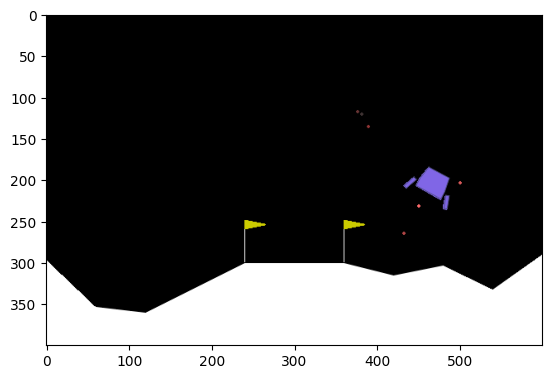

In [2]:
env = gym.make('LunarLander-v3', render_mode="rgb_array")
env.reset()
img = plt.imshow(env.render()) # only call this once

for _ in range(100):
    img.set_data(env.render()) # just update the data
    display.display(plt.gcf())
    display.clear_output(wait=True)
    action = env.action_space.sample()
    env.step(action)

## Blackjack

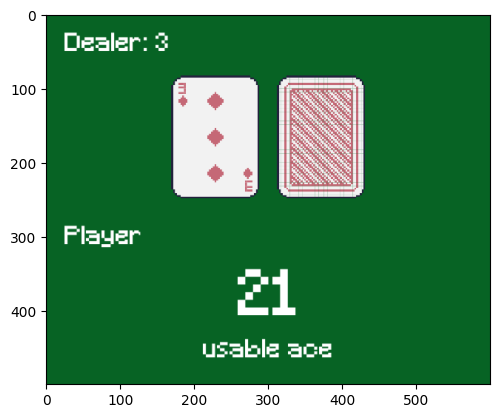

In [3]:
env = gym.make('Blackjack-v1', render_mode="rgb_array")
env.reset()
img = plt.imshow(env.render()) # only call this once


observations = []
actions = []

for i in range(100):
    img.set_data(env.render()) # just update the data
    display.display(plt.gcf())
    display.clear_output(wait=True)
    action = env.action_space.sample()
    observation, reward, done, info, _ = env.step(action)
    actions.append(action)
    observations.append(observation)
    
    if done:
        break

## How does the Gym work?

Recall that in RL the central entity is the transition distribution

$p(s', r | s, a)$ where $s, s' \in \mathcal{S}$ (state space), $r$ is the reward and $a \ \in \mathcal{A}$ (action space)

This can be also interpreted as defining random variables $S_{(s,a)}$ and $R_{(s,a)}$

OpenAI Gym's `env` object comes with defined $\mathcal{S}, \mathcal{A}$ and $p$; specifically the `env` is a stateful object that tracks current state, and `env.step(action)` returns a tuple that contains a sample from $S_{(s,a)}$, $R_{(s,a)}$ and additional information like whether the problem reached terminal state